**STATISTICAL LEARNING AND NEURAL NETWORKS, A.A. 2022/2023**

**COMPUTER LAB 2** - Model fitting and classification

**Duration: 6 hours**

**Exercise 1 – Model fitting for continuous distributions: Multivariate Gaussian**

In this exercise, you will employ a dataset based on the classic dataset *Iris Plants Database* https://archive.ics.uci.edu/ml/datasets/iris. You will be provided a subset of this dataset comprising only two classes (*Iris Setosa* and *Iris Versicolour*), and only two features per class (*petal length* in cm and *petal width* in cm). The objective is to the determine the kind of iris based on the content of the features.

**Task:** you have to fit class-conditional Gaussian multivariate distributions to the data, and visualize the probability density functions. In particular, you should perform the following:


*   Divide the dataset in two parts (*Iris Setosa* which corresponds to class zero and *Iris Versicolour* which correspond to class 1). Then work only on one class at a time.
*   Plot the data of each class (use the *plt.scatter( )* function)
*   Visualize the histogram of petal length and petal width (use e.g. the *plt.hist( )* function)
*   Calculate the maximum likelihood estimate of the mean and covariance matrix under a multivariate Gaussian model, independently for each class (these are the parameters of the class-conditional distributions). Note: is the Gaussian model good for these data?
*    Visualize the 2-D joint pdf of petal length and width for the two classes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

Dataset1 = h5py.File("./Lab2_Ex_1_Iris.hdf5")
Data = np.array(Dataset1.get('Dataset'))

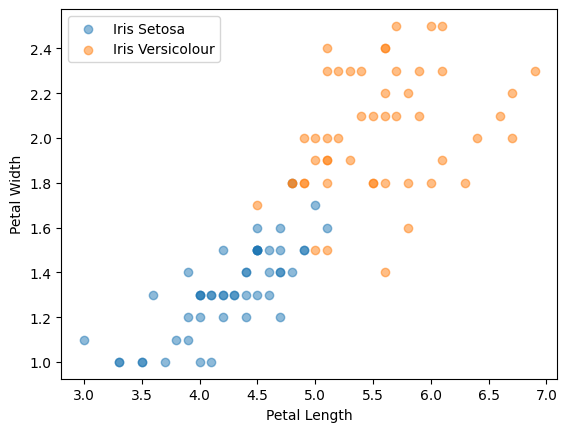

In [2]:
#Separate the dataset in the two classes, you can use the numpy function argsort and unique to do this.  
#Draw the scatter plot of the two classes on the same image
class_ISetosa = Data[Data[:, -1] == 0]  # read the dataset and extract the rows that have the last column equal to 0
class_IVersicolour = Data[Data[:, -1] == 1] # read the dataset and extract the rows that have the last column equal to 1

# Draw the scatter plot of the two classes on the same image
plt.scatter(class_ISetosa[:, 0], class_ISetosa[:, 1], label='Iris Setosa', alpha=0.5)
plt.scatter(class_IVersicolour[:, 0], class_IVersicolour[:, 1], label='Iris Versicolour', alpha=0.5)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

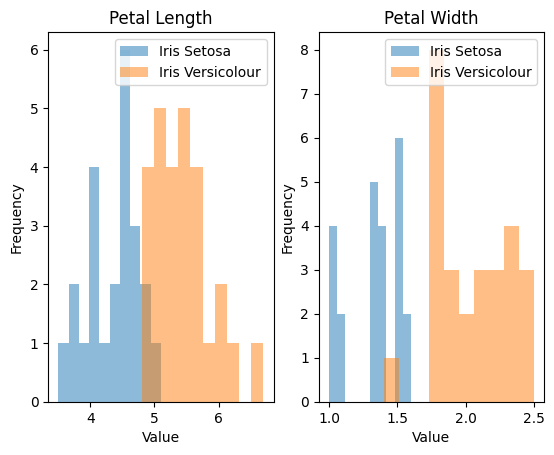

In [5]:
#Visualize the histogram of petal length and petal width (use e.g. the plt.hist() function)
plt.figure()
plt.subplot(1, 2, 1)
plt.hist(class_ISetosa[:, 0], bins=10, alpha=0.5, label='Iris Setosa')
plt.hist(class_IVersicolour[:, 0], bins=10, alpha=0.5, label='Iris Versicolour')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.title('Petal Length')
plt.subplot(1, 2, 2)
plt.hist(class_ISetosa[:, 1], bins=10, alpha=0.5, label='Iris Setosa')
plt.hist(class_IVersicolour[:, 1], bins=10, alpha=0.5, label='Iris Versicolour')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.title('Petal Width')
plt.show()

In [21]:
#Calculate mean and covariance matrix under a multivariate Gaussian model. Scalar products can be computed with the function np.matmul()
#The transpose can be obtained with the function np.transpose 

#To make a scalar product between arrays in the form [Mx1]x[1xM] starting from 1D array A it may be necessary to add a new axis using the function A[:,np.newaxis]
mean_ISetosa = np.mean(class_ISetosa[:, :-1], axis=0)   # mean value - the last column is the class, so i don't consider it
mean_IVersicolour = np.mean(class_IVersicolour[:, :-1], axis=0)  # mean value
cov_ISetosa = np.cov(np.transpose(class_ISetosa[:, :-1]))   # covariance matrix
cov_IVersicolour = np.cov(np.transpose(class_IVersicolour[:, :-1])) # covariance matrix

# try to calculate covariance withouth using np.cov, by using the formula for the covariance matrix
# cov = (X - mean)T * (X - mean) / (n - 1)
my_cov_ISetosa = np.matmul(np.transpose(class_ISetosa[:, :-1] - mean_ISetosa), class_ISetosa[:, :-1] - mean_ISetosa) / (len(class_ISetosa) - 1)
my_cov_IVersicolour = np.matmul(np.transpose(class_IVersicolour[:, :-1] - mean_IVersicolour), class_IVersicolour[:, :-1] - mean_IVersicolour) / (len(class_IVersicolour) - 1)

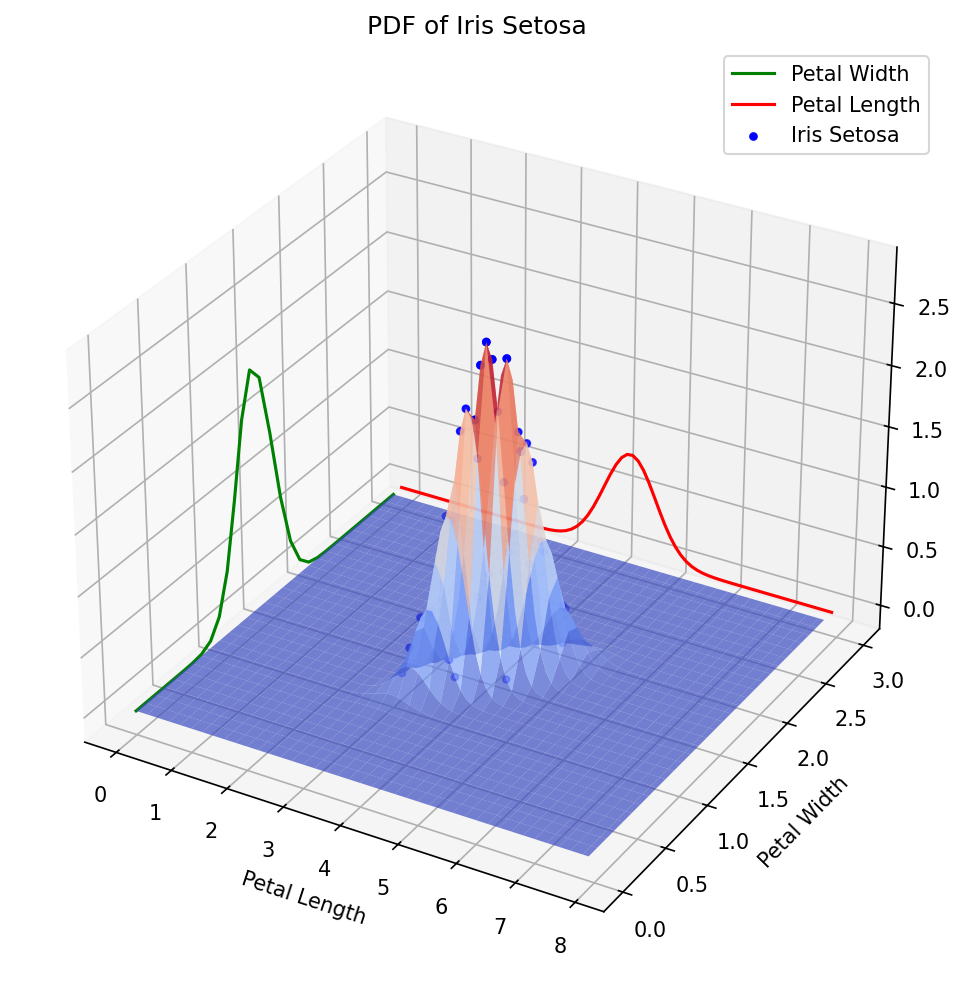

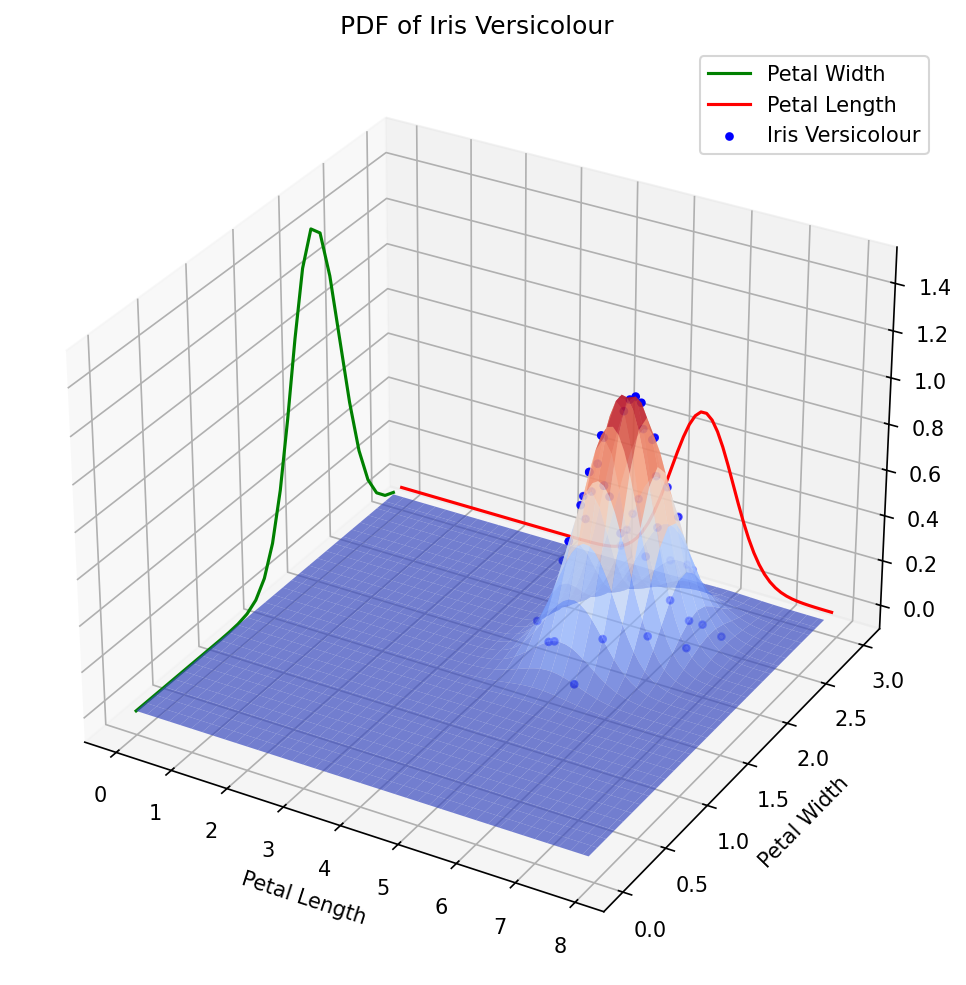

In [22]:
#Visualize the 2-D joint pdf of petal length and width, a pdf function can be initialized by providing mean and covariance matrix
from scipy.stats import multivariate_normal, norm
from matplotlib import cm
from matplotlib.ticker import LinearLocator

#pdf_class0 = multivariate_normal(mean=..., cov=...)
#pdf_class1 = multivariate_normal(mean=..., cov=...)
pdf_classISetosa = multivariate_normal(mean=mean_ISetosa, cov=my_cov_ISetosa)  # create a multivariate normal distribution with the mean and covariance matrix
pdf_classIVersicolour = multivariate_normal(mean=mean_IVersicolour, cov=my_cov_IVersicolour)  # create a multivariate normal distribution with the mean and covariance matrix

mean_ISetosa_Length = mean_ISetosa[0]   # extract the mean value of the single features
mean_ISetosa_Width = mean_ISetosa[1]

var_ISetosa_Length = my_cov_ISetosa[0, 0]   # extract the variance of the single features
var_ISetosa_Width = my_cov_ISetosa[1, 1]

pdf_classISetosa_Length = norm(loc=mean_ISetosa_Length, scale=np.sqrt(var_ISetosa_Length))   # create a normal distribution with the mean and variance
pdf_classISetosa_Width = norm(loc=mean_ISetosa_Width, scale=np.sqrt(var_ISetosa_Width))   # create a normal distribution with the mean and variance

mean_IVersicolour_Length = mean_IVersicolour[0]   # extract the mean value of the single features
mean_IVersicolour_Width = mean_IVersicolour[1]

var_IVersicolour_Length = my_cov_IVersicolour[0, 0]   # extract the variance of the single features
var_IVersicolour_Width = my_cov_IVersicolour[1, 1]

pdf_classIVersicolour_Length = norm(loc=mean_IVersicolour_Length, scale=np.sqrt(var_IVersicolour_Length))   # create a normal distribution with the mean and variance
pdf_classIVersicolour_Width = norm(loc=mean_IVersicolour_Width, scale=np.sqrt(var_IVersicolour_Width))   # create a normal distribution with the mean and variance

#Create a grid of x and y values on which to sample the pdf, this is done by providing a list of x-y of coordinates to the function pdf_class0.pdf(...)
#A 3D view of the pdf can be obtained using the function ax.plot_surface

#Code Example:

#X = np.arange(...)
#Y = np.arange(...)

#X, Y = np.meshgrid(X, Y)
#X_flat = X.flatten()
#Y_flat = Y.flatten()
#XY_list = np.concatenate((X_flat[:,np.newaxis],Y_flat[:,np.newaxis]),axis=1)
#PDF_values = np.reshape(pdf_class0.pdf(XY_list), np.shape(X))

#fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(8, 8), dpi=150)
#ax.plot_surface(X, Y, PDF_values, cmap=cm.coolwarm, alpha=0.7, linewidth=0)

#To change the orientation of the 3D plot the function ax.view_init(), for a view from above select ax.view_init( 90, 0)

X = np.arange(0, 8, 0.1)    # create a range of values for the x axis
Y = np.arange(0, 3, 0.1)    # create a range of values for the y axis
X, Y = np.meshgrid(X, Y)    # create a grid of x and y values
X_flat = X.flatten()    # flatten the x values - it transforms the 2D array into a 1D array
Y_flat = Y.flatten()    # flatten the y values
#X_flat[:, np.newaxis] - the vector is transformed into a column vector
#np.concatenate((X_flat[:, np.newaxis], Y_flat[:, np.newaxis]), axis=1) - concatenate two column vectors into a matrix
XY_list = np.concatenate((X_flat[:, np.newaxis], Y_flat[:, np.newaxis]), axis=1)    # concatenate the x and y values
PDF_values_ISetosa = np.reshape(pdf_classISetosa.pdf(XY_list), np.shape(X))    # calculate the pdf values at each point of the grid
PDF_values_IVersicolour = np.reshape(pdf_classIVersicolour.pdf(XY_list), np.shape(X))    # calculate the pdf values

fig_ISetosa, ax_ISetosa = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8, 8), dpi=150)    # create a 3D plot
ax_ISetosa.plot_surface(X, Y, PDF_values_ISetosa, cmap=cm.coolwarm, alpha=0.7, linewidth=0)    # plot the surface of the pdf
# plot the single features
ax_ISetosa.plot(0, Y, pdf_classISetosa_Width.pdf(Y), color='green', label='Petal Width')   # plot the pdf of the petal width
ax_ISetosa.plot(np.arange(0, 8, 0.1), 3.0, pdf_classISetosa_Length.pdf(np.arange(0, 8, 0.1)), color='red', label='Petal Length')   # plot the pdf of the petal length
plt.xlabel('Petal Length')  # set the label of the x axis
plt.ylabel('Petal Width')   # set the label of the y axis
plt.title('PDF of Iris Setosa')   # set the title of the plot
ax_ISetosa.scatter3D(class_ISetosa[:, 0], class_ISetosa[:, 1], pdf_classISetosa.pdf(class_ISetosa[:, :-1]), s=10, color='blue', label='Iris Setosa')   # plot the points of the dataset on the pdf
ax_ISetosa.legend()    # show the legend

fig_IVersicolour, ax_IVersicolour = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8, 8), dpi=150)    # create a 3D plot
ax_IVersicolour.plot_surface(X, Y, PDF_values_IVersicolour, cmap=cm.coolwarm, alpha=0.7, linewidth=0)    # plot the surface of the pdf
# plot the single features
ax_IVersicolour.plot(0, Y, pdf_classIVersicolour_Width.pdf(Y), color='green', label='Petal Width')   # plot the pdf of the petal width
ax_IVersicolour.plot(np.arange(0, 8, 0.1), 3.0, pdf_classIVersicolour_Length.pdf(np.arange(0, 8, 0.1)), color='red', label='Petal Length')   # plot the pdf of the petal length
#ax_IVersicolour.view_init(90, 0)    # change the view of the plot
plt.xlabel('Petal Length')  # set the label of the x axis
plt.ylabel('Petal Width')   # set the label of the y axis
plt.title('PDF of Iris Versicolour')   # set the title of the plot
ax_IVersicolour.scatter3D(class_IVersicolour[:, 0], class_IVersicolour[:, 1], pdf_classIVersicolour.pdf(class_IVersicolour[:, :-1]), s=10, color='blue', label='Iris Versicolour')
ax_IVersicolour.legend()    # show the legend

#After visualizing the pdf you can plot the points of the dataset on the estimated pdf using ax.scatter3D()
#For a better visualization of the points we suggest to make the pdf plot semi-transparent using the alpha parameter
#Code Example: 
#PDF_points_class0 = pdf_class0.pdf(Features_class0)
#ax.scatter3D(Points_Class0_Feature0, Points_Class0_Feature1, PDF_points_class0, s=10)

# Show the plot
plt.show()

#Note: the sample code was written only for class 0 but two plots have to be done, one for class 0 and one for class 1
#Note 2: the content of variables like Features_class0, Points_Class0_Feature0, Points_Class0_Feature1 should be substituted with variables created by the student

**Student's comments to Exercise 1**

In this exercise we see how to handle multivariate gaussian distribution. We receive a dataset of Iris plants with 2 features and two possible classes (Iris Setosa or Iris Veriscular). So, the given matrix of the dataset contains three columns, the first two rappresent the features of the plants (petal length and petal width) and the last one rappresent the class associated to the plant. We want to understand the correlations between these two features in each class. We can do this by combining the pdfs of the features in an unique multivariate normal distribution that rappresents the correlation of these features in a selected class. 

We first plot as points in a two dimensional space the values of the features of these classes, so we can see how these values changes due to the appartaing class. We understand that Iris Setosa has bigger petal than Venticular.
Then, without separating the data for the classes, we plot as an histogram the frequency of each value of length and width. From this we understand the distribution of values for length and width, without considering the class of the petals.
Finally, we combine the pdf of the features of a given class and we build a multivariate gaussian distribution, that helps us to understand the correlations between these features.
The pdfs that we are combining have their own mean and variance. We are not assuming that they are independents from each other, but we are evaluating multivariate distribution just for understanding the correlations between them. 

I have plotted on the background the marginal pdfs of the individual features, to see than how they combine into the multivariate distribution.
Normal distribution:
$N(\mathbf{x}|\mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{\frac{-1}{2\sigma^2} (x-\mu)^2}$

The multivariate distribution shows the joint probability of the features, so we can understand the correlations between these.
Multivariate normal distribution:
$N(\mathbf{x}|\mu, Ʃ) = \frac{1}{(2\pi)^{D/2} |Ʃ|^{1/2}} e^{\frac{-1}{2} (x-\mu)^T Ʃ^{-1} (x-\mu)}$

In the multivariate gaussian distribution, the parameter $\mu$ is a vector containing the means of each features, and Ʃ is the covariance matrix that measures the correlations between couples of featrues (positive cov, their behevior is directly proportional; negative cov, their behevior is inversely proportional).
The parameter D is the number of features of x. The formula that we use as power of e rappresent the Mahalanobis distance divided by half.

In my case, D is equal to 2, so: $N(\mathbf{x}|\mu, Ʃ) = \frac{1}{2\pi \sqrt{|Ʃ|}} e^{\frac{-1}{2} \begin{bmatrix} x_1-\mu_1 & \\x_2-\mu_2 \end{bmatrix}^T Ʃ^{-1} \begin{bmatrix} x_1-\mu_1 & \\x_2-\mu_2 \end{bmatrix}}$

Then, if the two features weren't correlated, then the covariance matrix will be equal to $[\sigma_1^2, \dots, \sigma_n^2] I$, where I is the Identity matrix. This clearly because the correlations between the features are 0, and the covariance matrix will contain only the variances of these. This is the case of diagonal covariance matrix. There is also the case where the features share the same variance value, so the covariance is euqals to $\sigma^2 I$, and this is the case of spherical covariance matrix.

If and only if the features are not correlated, then the value on the multivariate normal distribution is equals to the product of the two marginals in that point. On the other hand, when the features are correlated, the $\rho$ (correlation coefficent) distorts the joint probability.

**Exercise 2 - Model fitting for discrete distributions: Bag of Words**


In this exercise, you will employ a real dataset (file *SMSSpamCollection*). The SMS Spam Collection v.1 (https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset) is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being  (legitimate) or spam.
Task: you have to fit the parameters employed by a Naïve Bayes Classifier, using a Bernoulli model. Under this model, the parameters are:

*   $\pi_{c}$, the prior probabilities of each class.
*   $\theta_{jc}$, the probability that feature j is equal to 1 in class c.

Model fitting can be done using the pseudocode at the end of the Lecture 3 slides.

Display the class-conditional densities $\theta_{jc1}$ and $\theta_{jc2}$. Try to identify “uninformative” features (i.e., features j such that $\theta_{jc1}$ ≃ $\theta_{jc2}$).

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# reading the data
data = pd.read_csv("SMSSpamCollection", encoding="ISO-8859-1", sep="\t", header=None)
data.rename(columns={0: "labels", 1: "text"}, inplace=True)
display(data)

# Transform data to bag of word representation
bagger = CountVectorizer(
    max_features=2500,
    binary=True,  # Bernulli Model
    token_pattern=r"(?u)\b[a-zA-Z][a-zA-Z]+\b",
)
bag = bagger.fit_transform(data["text"]).toarray()
feature_names = bagger.get_feature_names_out()

data = pd.concat([data, pd.DataFrame(bag, columns=feature_names)], axis=1)
display(data)

X_train = data.iloc[:2000,2:].to_numpy()    # selects the first 2000 rows and all the columns except the first two (labels and text removed) for the training data
X_test = data.iloc[2000:3000,2:].to_numpy() # the rows from 2000 to 3000 and all the columns except the first two (labels and text removed) for the test data
y_train = data.iloc[:2000,0].to_numpy() == 'ham'    # extract the labels of the training data, if the label is 'ham' it will be True
y_test = data.iloc[2000:3000,0].to_numpy() == 'ham'   # extract the labels of the test data, if the label is 'ham' it will be True

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


,labels,text,aah,aathi,abi,abiola,able,about,abt,abta,...,you,your,yours,yourself,yr,yrs,yummy,yun,yup,zed
0,ham,"Go until jurong point, crazy.. Available only ...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ham,Ok lar... Joking wif u oni...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ham,U dun say so early hor... U c already then say...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,ham,Will Ã¼ b going to esplanade fr home?,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,ham,The guy did some bitching but I acted like i'd...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#from google.colab import drive
#drive.mount('/content/drive')

In [13]:
# from the pseudocode for the Naive Bayes classifier seen in the lecture
print("\nNaive Bayes Classifier:\n")
# Fitting a Naive Bayes classifier to binary features
Nc = np.zeros(2)    # number of messages of each class
Njc = np.zeros((X_train.shape[1], 2))   # number of times each word appears in the messages of each class
for i in range(len(y_train)):    # iterate through the messages
    c = 1 if y_train[i] else 0   # determine class: ham (1) or spam (0)
    Nc[c] += 1  # count the number of messages of each class
    for j in range(len(X_train[i])):    # iterate through the words of the message
        if(X_train[i][j] == 1):   # if the word appears in the message
            Njc[j][c] += 1 # count the number of times the word appears in the messages of the class
pi_c = Nc / len(y_train)     # probability of the classes -> rappresents the prior probability of each class
teta_jc = np.zeros((X_train.shape[1], 2))   # probability of the words given the class
for j in range(Njc.shape[0]):    # iterate through the features (words)
    teta_jc[j] = (Njc[j]) / (Nc)    # evaluate the probability of a feature to be equal to 1 (a word to be present inside the message) given the class
print(f"Priors:\npi_ham = {pi_c[1]}", f"\npi_spam = {pi_c[0]}")
print(f"Likelihoods:\nteta_ham = {teta_jc[:,1]}", f"\nteta_spam = {teta_jc[:,0]}")

eps = 1e-4  # threshold for the difference between the probabilities
uninf_words = []    # list of uninformative words
for j in range(teta_jc.shape[0]):
    if(np.abs(teta_jc[j][0] - teta_jc[j][1]) < eps):
        uninf_words.append(feature_names[j])
print(f"\nUninformative words:\n{uninf_words}")

# i could also evaluate this probabilities more easly without using the pseudocode
print("\nFast evaluation:\n")
def NBC(X, y):
    # the prior probabilities of each class can easly be calculated by counting how many messages are lebeled as a class and dividing by the total number of messages
    pi_ham = np.mean(y)    # calculate the probability of the class 'ham'
    pi_spam = 1 - pi_ham  # calculate the probability of the class 'spam'

    # the likelihoods can be calculated by counting how many times each word appears in the messages of a specific class and dividing by the number of messages of that class
    # separate samples of the two classes
    X_ham = X[y]  # i use the index where y is True to extract the rows that have the label 'ham'
    X_spam = X[~y]    # same thing but where y is False, so the label is 'spam'
    # calculate the class conditional densities
    # teta_ham indicates the  likelihood of the word i given that the message has the class 'ham'
    # X_ham.sum(axis=0) - sums the togheter all the rows of the matrix, so it counts for each word how many times it appears in the messages of the class 'ham'
    teta_ham = (X_ham.sum(axis=0)) / (X_ham.shape[0])
    teta_spam = (X_spam.sum(axis=0)) / (X_spam.shape[0])

    uninf_words = []    # list of uninformative words
    for j in range(teta_jc.shape[0]):
        if(np.abs(teta_jc[j][0] - teta_jc[j][1]) < eps):
            uninf_words.append(feature_names[j])

    return pi_ham, pi_spam, teta_ham, teta_spam, uninf_words

pi_ham, pi_spam, teta_ham, teta_spam, uninf_words = NBC(X_train, y_train)
print(f"Priors:\npi_ham = {pi_ham}")
print(f"pi_spam = {pi_spam}")
print(f"Likelihoods:\nteta_ham = {teta_ham}")
print(f"teta_spam = {teta_spam}")
print(f"\nUninformative words:\n{uninf_words}")


Naive Bayes Classifier:

Priors:
pi_ham = 0.86 
pi_spam = 0.14
Likelihoods:
teta_ham = [0.0005814  0.00116279 0.         ... 0.00174419 0.00697674 0.        ] 
teta_spam = [0.         0.         0.         ... 0.         0.         0.00357143]

Uninformative words:
['abi', 'accident', 'added', 'advice', 'affairs', 'ahmad', 'amazing', 'amount', 'argh', 'armand', 'art', 'asks', 'audition', 'aunty', 'auto', 'away', 'bags', 'basic', 'behind', 'bell', 'ben', 'billed', 'birth', 'blow', 'books', 'boost', 'booty', 'brilliant', 'budget', 'calicut', 'california', 'callback', 'cancer', 'cann', 'cars', 'celebrate', 'challenge', 'checked', 'cheer', 'china', 'citizen', 'colleagues', 'collecting', 'comes', 'common', 'concert', 'confirm', 'confirmed', 'cooking', 'cornwall', 'dai', 'dare', 'dark', 'death', 'deliver', 'deliveredtomorrow', 'doc', 'downloads', 'dress', 'drinking', 'dubsack', 'eaten', 'eggs', 'else', 'empty', 'eng', 'enuff', 'er', 'erm', 'eve', 'expecting', 'fantasy', 'favor', 'feb', 'fee

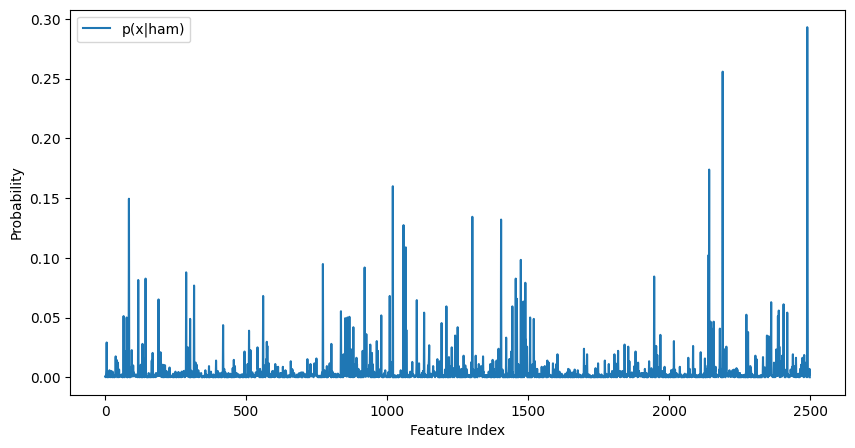

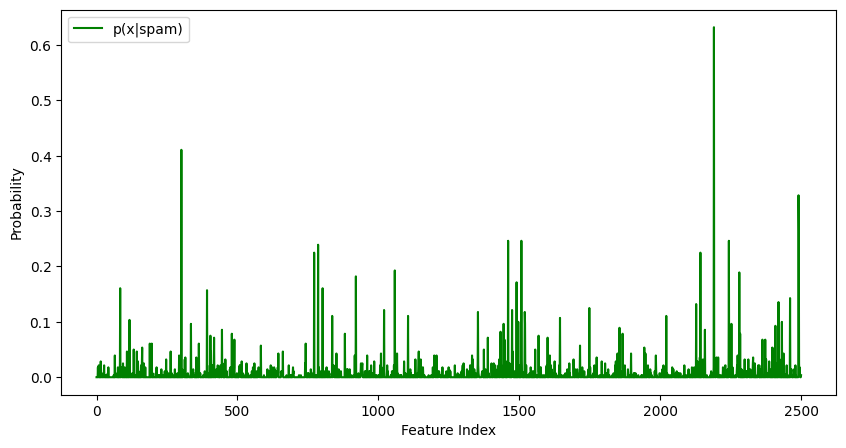

In [26]:
#Display the class-conditional densities θjc1 and θjc2.
plt.figure(figsize=(10, 5))
plt.plot(teta_ham, label='p(x|ham)')
plt.xlabel('Feature Index')
plt.ylabel('Probability')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(teta_spam, label='p(x|spam)', color='green')
plt.xlabel('Feature Index')
plt.ylabel('Probability')
plt.legend()
plt.show()

**Student's comments to Exercise 2**

The exercise asks to evaluate the prior probabilities and likelihoods of each class by using a Naive Bayes Classifier. We receive as input a dataset of 5572 messages (samples of our dataset), each has 2500 features, that rappresent all the possible words that can appear into a message. At each message is also associated a class, that could be 'ham', if it is legitimate or 'spam', if it is considered as a spam message. This dataset is divided into trainig and testing. During this exercise we only use the train set.

It is also said that the algorithm uses Bernoulli model, this means that is based on the Bernoulli pdf: we have two possible classes ($c_1$ and $c_2$), the probability of a message $x$ to be of class $c_1$ is $p(x = c_1) = 1 - p(x = c_2)$

Firstly we have to apply Naive Bayes Classifier to evaluate the prior probabilities and the likelihoods for each class. For evaluating the priors we have to count how many messages there are in the dataset apparteining to a specific class, then we will divide this value for the total number of messages in the dataset. The result will rappresent the probability of a message to appartain to a specific class, without knowing anithing about the words that it contains. So this is the prior probability.
Then we have to evaluate the likelihood, so, given that we know the class the messages, evaluating the probability for each feature to be equal to 1 in all the messages of that class. To determ the likelihood we should count how many times the features (words) is equal to 1 inside the messages of a class, and then divide for the total number of messages of that class. 

In the code i have done two different ways to doing so. The first is done by following the pseudocode given at the lecture, the second is done without any iterations by exploiting the structure of the dataset. So obviusly the second method is more fast and less costly. It is shown that they return the same results about $\pi_c$ and $\theta_{jc}$, where $\pi$ is the prior, $\theta$ is the likelihood, c is the class and j is the feature.

Then we have been asked to find the uninformative features, so the words that give to us low or zero information about the class of the message. To doing so i evaluate the absolute value of the difference between the likelihood of the word in messages of class 'ham' and the likelihood in messages classified as 'spam'. If this difference is lower than a threshold, this means that the likelihoods are very similar between them and so that words doesn't help us to understand the class of the message.

Finally, the likelihoods are plotted, so we can see how many information each words give to us about the class of a message.

**Exercise 3 - Classification – discrete data**

In this exercise, you will design a Naïve Bayes Classifier (NBC) for the Bag of Words (BoW) features for document classification that have been prepared in *Exercise 2*. In particular, in *exercise 2*, you have already estimated the following parameters:


*   The prior probabilities of each class, $\pi_{c} = p(y=c)$.
*   The class-conditional probabilities of each feature, $\theta_{jc} = p(x_{j}=1 | y=c)$.

These parameters have been estimated from the training data. In this exercise, you will use the test data, and classify each test vector using an NBC whose model has been fitted in *Exercise 2*. In particular, you will do the following:



*   For each test vector, calculate the MAP estimate of the class the test vector belongs to. Remember: the MAP classifier chooses the class that maximizes $\mathop{\max\limits_c{\log p(y=c|x)} \propto \log p(x|y=c)} + \log p(c)$. In the NBC, the features (i.e. each entry of $x$) are assumed to be statistically independent, so $p(x|y=c) = \prod_{j=1}^{D}p(x_{j}|y=c)$. This formula allows you to calculate $p(x|y=c)$ for a given test vector $x$ using the parameters $\theta_{jc}$ already calculated in *Exercise 2*. Note that, after the logarithm, the product 
becomes a summation. It is much better to use the logarithm in order to avoid underflow.
*   See how the accuracy changes when the prior is not taken into account (e.g. by comparing the MLE and MAP estimate).
*   After classifying a test vector using the NBC, the obtained class can be compared with the truth (vector *ytest*).
*   The accuracy of the classifier can be computed as the percentage of times that the NBC provides the correct class for a test vector.
*   Repeat the same operations using the training data as test data, and compare the accuracy of the classifier on the training and test data.
*   Note: It is expected that students implement the Naive Bayes classifier from scratch without using pre-made functions such as sklearn.naive_bayes

**Optional:**

If you plot the class-conditional densities as done at the end of Exercise 2, you will see that many features are uninformative; e.g., words that appear very often (or very rarely) in documents belonging to either class are not very helpful to classify a document. The NBC can perform a lot better if these uninformative features are disregarded during the classification, i.e. only a subset of the features, chosen among the most informative ones, are retained. To rank the features by “significance”, one can employ the mutual information between feature $x_{j}$ and class $y$ (see Sec. 3.5.4 of the textbook):

\begin{align*}
I(X,Y) = \sum_{xj} \sum_{y}p(x_{j},y) \log \frac{p(x_{j},y)}{p(x_{j})p(y)}
\end{align*}

For binary features, the mutual information of feature j can be written as:

\begin{align*}
I_{j} = \sum_{c} \left[\theta_{jc}\pi_{c}\log \frac{\theta_{jc}}{\theta_{j}}+ (1 - \theta_{jc})\pi_{c} \log \frac{1 - \theta_{jc}}{1 - \theta_{j}}\right]
\end{align*}

with $\theta_{j}=p(x_{j}=1)=\sum_{c}\pi_{c}\theta_{jc}$. For this part, you should:


*   Calculate $I_{j}$ for all features. Note: try to avoid divisions by zero adding the machine precision constant *eps* to the denominators.
*   Rank the features by decreasing values of $I_{j}$, and keep only the $K$ most important ones.

*    Run the classifier employing only the $K$ most important features, and calculate the accuracy.

*    Plot the accuracy as a function of $K$.

In [27]:
eps = 1e-5  # avoid logarithm of zero
#Evaluate the MAP on the test set - MAP (Maximum A Posteriori) classifier

def MAP(X, teta_ham, teta_spam, pi_ham, pi_spam):
    c_MAP = []  # list of the predictions
    for i in range(X.shape[0]):    # iterate through the messages of the test set
        # evaluate the likelihoods of seeing the selected message given the class
        p_x_ham = np.sum(np.log(teta_ham[X[i] == 1] + eps)) + np.sum(np.log(1 - teta_ham[X[i] == 0] + eps))  # we must consider the probability of the presences of the present words and the absence of the absent words
        p_x_spam = np.sum(np.log(teta_spam[X[i] == 1] + eps)) + np.sum(np.log(1 - teta_spam[X[i] == 0] + eps))
        c_MAP.append(np.argmax([p_x_spam + np.log(pi_spam), p_x_ham + np.log(pi_ham)]))   # select the class with the highest a posteriori probability

    return np.array(c_MAP)  # return the predictions

c_MAP = MAP(X_test, teta_ham, teta_spam, pi_ham, pi_spam)  # evaluate the predictions of the MAP classifier
# calculate the accuracy of the model
accuracy = np.mean(c_MAP == y_test) # how many times the MAP classifier predicted the correct class divided by the total number of messages
print(f"MAP Accuracy on test set = {accuracy}")

MAP Accuracy on test set = 0.98


In [28]:
#Evaluate the MLE on the test set - MLE (Maximum Likelihood Estimation) classifier

def MLE(X, teta_ham, teta_spam):
    c_MLE = []  # list of the predictions
    for i in range(X.shape[0]):    # iterate through the messages of the test set
        # evaluate the likelihoods of seeing the selected message given the class
        p_x_ham = np.sum(np.log(teta_ham[X[i] == 1] + eps)) + np.sum(np.log(1 - teta_ham[X[i] == 0] + eps))
        p_x_spam = np.sum(np.log(teta_spam[X[i] == 1] + eps)) + np.sum(np.log(1 - teta_spam[X[i] == 0] + eps))
        c_MLE.append(np.argmax([p_x_spam, p_x_ham]))   # select the class with the highest a posteriori probability

    return np.array(c_MLE)  # return the predictions

c_MLE = MLE(X_test, teta_ham, teta_spam)  # evaluate the predictions of the MLE classifier
# calculate the accuracy of the model
accuracy = np.mean(c_MLE == y_test) # how many times the MAP classifier predicted the correct class divided by the total number of messages
print(f"MLE Accuracy on test set = {accuracy}")

MLE Accuracy on test set = 0.984


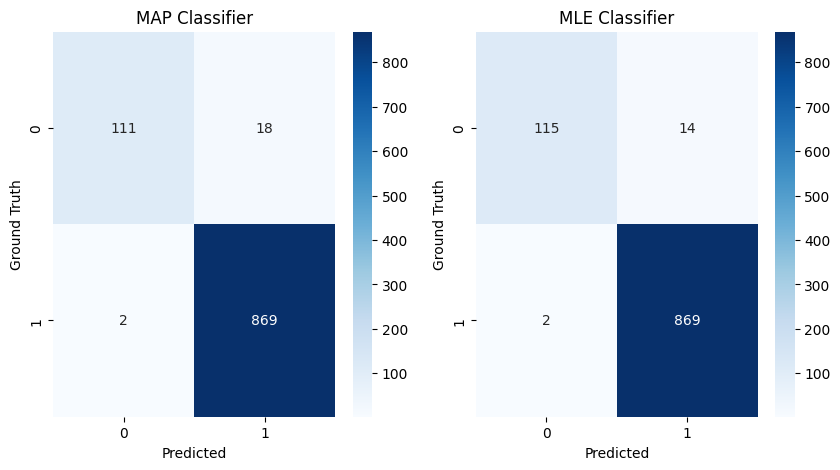

In [29]:
# Compare MPA and MLE
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# calculate the confusion matrix
conf_matrix_MAP = confusion_matrix(y_test, c_MAP)
conf_matrix_MLE = confusion_matrix(y_test, c_MLE)

# confusion matrix has the following structure: [[TN, FP], [FN, TP]]

# plot the confusion matrix
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_MAP, annot=True, fmt='d', cmap='Blues')
plt.title('MAP Classifier')
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_MLE, annot=True, fmt='d', cmap='Blues')
plt.title('MLE Classifier')
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')

plt.show()

MAP Accuracy on train set = 0.9975
MLE Accuracy on train set = 0.997


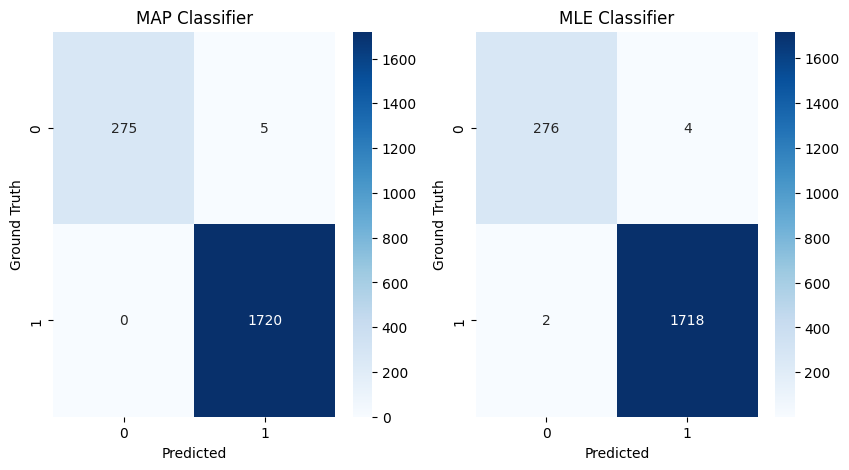

In [30]:
# MAP and MLE on train set

c_MAP_train = MAP(X_train, teta_ham, teta_spam, pi_ham, pi_spam)  # evaluate the predictions of the MAP classifier on the training set
c_MLE_train = MLE(X_train, teta_ham, teta_spam)  # evaluate the predictions of the MLE classifier on the training set

# calculate the accuracy of the model
accuracy_MAP_train = np.mean(c_MAP_train == y_train) # how many times the MAP classifier predicted the correct class divided by the total number of messages
accuracy_MLE_train = np.mean(c_MLE_train == y_train) # how many times the MLE classifier predicted the correct class divided by the total number of messages
print(f"MAP Accuracy on train set = {accuracy_MAP_train}")
print(f"MLE Accuracy on train set = {accuracy_MLE_train}")

conf_matrix_MAP_train = confusion_matrix(y_train, c_MAP_train)
conf_matrix_MLE_train = confusion_matrix(y_train, c_MLE_train)

# plot the confusion matrix
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_MAP_train, annot=True, fmt='d', cmap='Blues')
plt.title('MAP Classifier')
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_MLE_train, annot=True, fmt='d', cmap='Blues')
plt.title('MLE Classifier')
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')

plt.show()

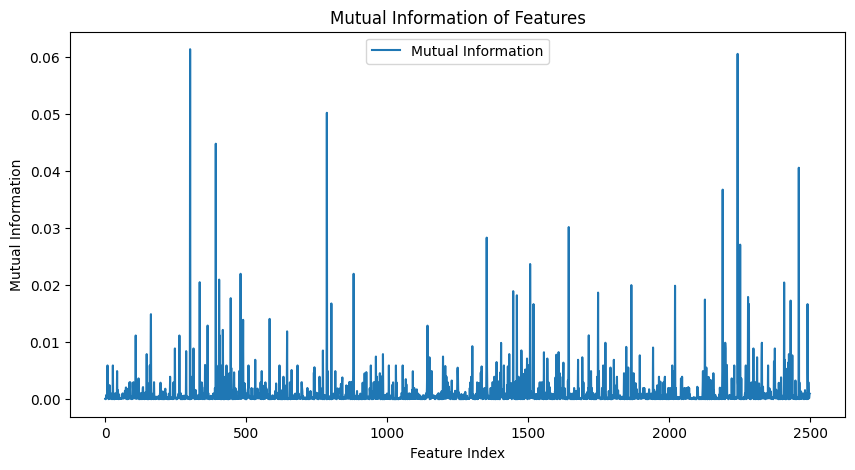

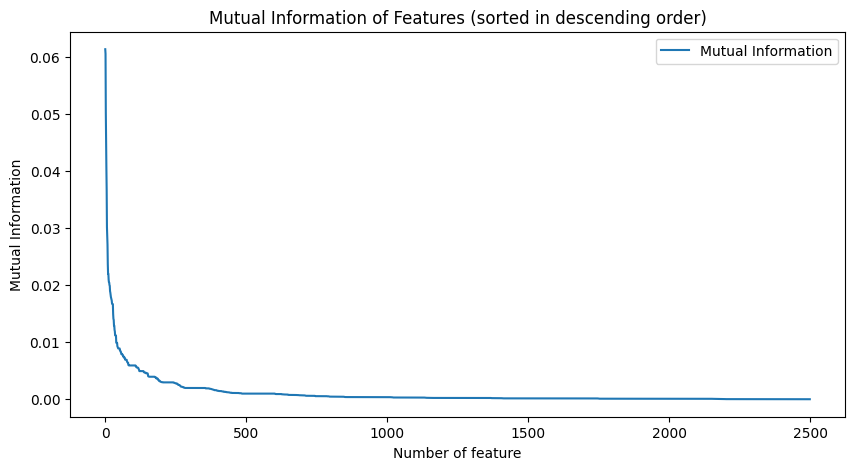

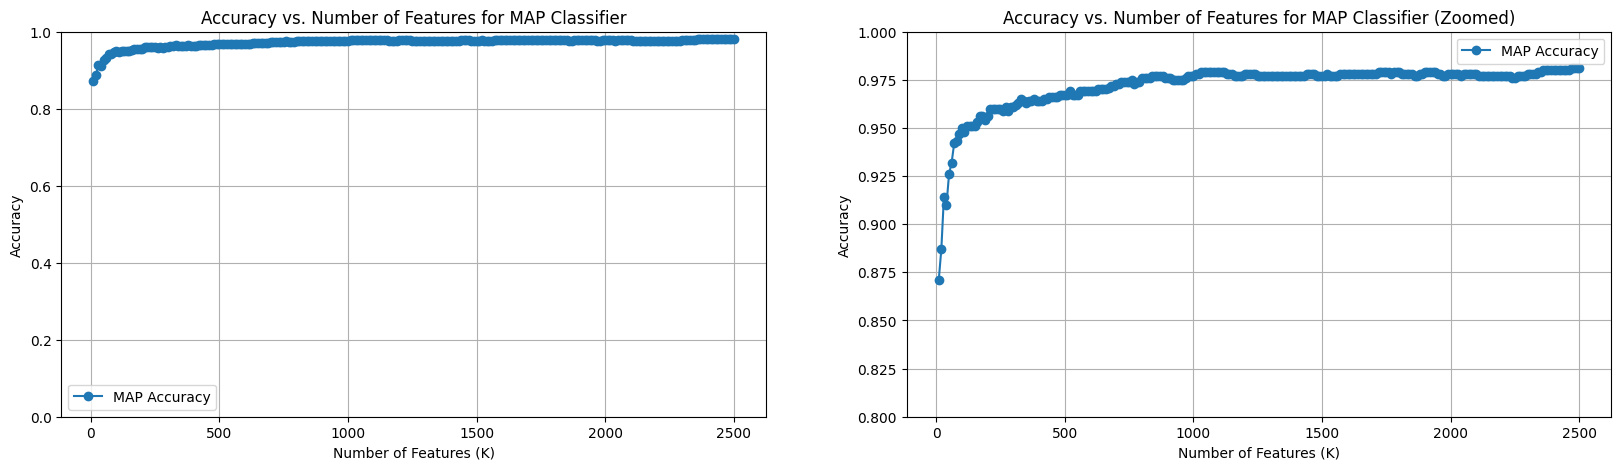

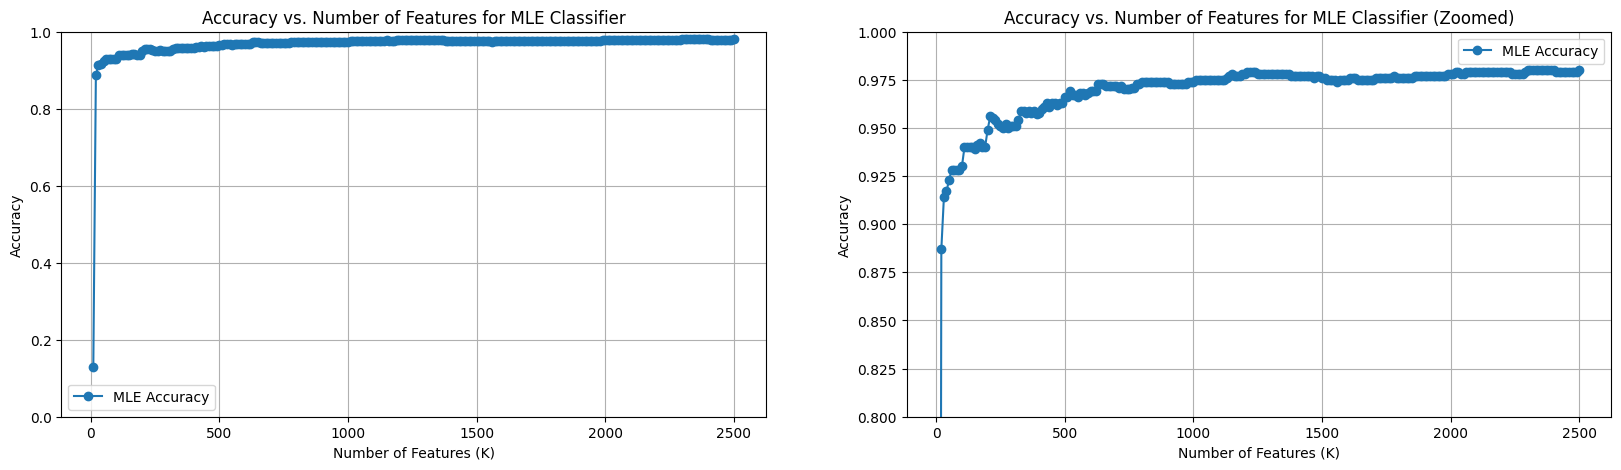

In [31]:
# Optional section

eps = 1e-5  # avoid division by zero
I = np.zeros(X_train.shape[1])  # mutual information for each feature
for j in range(X_train.shape[1]):   # iterate through the features
    teta_j = np.sum(teta_jc[j] * pi_c)
    I[j] = np.sum(teta_jc[j] * pi_c * np.log(teta_jc[j] / (teta_j + eps) + eps) + (1 - teta_jc[j]) * pi_c * np.log((1 - teta_jc[j]) / (1 - teta_j + eps) + eps))

# Plot the mutual information
plt.figure(figsize=(10, 5))
plt.plot(I, label='Mutual Information')
plt.xlabel('Feature Index')
plt.ylabel('Mutual Information')
plt.title('Mutual Information of Features')
plt.legend()
plt.show()

I_sorted = np.argsort(I)[::-1]  # sort the mutual information in descending order
plt.figure(figsize=(10, 5))
plt.plot(I[I_sorted], label='Mutual Information')
plt.xlabel('Number of features')
plt.ylabel('Mutual Information')
plt.title('Mutual Information of Features (sorted in descending order)')
plt.legend()
plt.show()

K = np.arange(10, X_train.shape[1] + 1, 10)  # test K from 1 to max features in steps of 10
MAP_accuracies = np.zeros(len(K))    # list of accuracies
MLE_accuracies = np.zeros(len(K))    # list of accuracies
for k in range(len(K)):   # iterate through the K values
    top_features = I_sorted[:k] # select the K features with the highest mutual information
    X_train_reduced = X_train[:, top_features]  # reduce the training set to the top K features
    X_test_reduced = X_test[:, top_features]    # reduce the test set to the top K features
    # recompute class-conditional densities
    pi_ham, pi_spam, teta_ham_reduced, teta_spam_reduced = NBC(X_train_reduced, y_train)
    # classify test set
    c_MAP_reduced = MAP(X_test_reduced, teta_ham_reduced, teta_spam_reduced, pi_ham, pi_spam)
    c_MLE_reduced = MLE(X_test_reduced, teta_ham_reduced, teta_spam_reduced)
    # store accuracy
    MAP_accuracies[k] = np.mean(c_MAP_reduced == y_test)
    MLE_accuracies[k] = np.mean(c_MLE_reduced == y_test)

# Plot accuracy vs K for MAP Classifier
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(K, MAP_accuracies, marker='o', label='MAP Accuracy')
plt.xlabel('Number of Features (K)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Features for MAP Classifier')
plt.grid()
plt.legend()
plt.ylim(0.0, 1.0)  # Set the same y-axis limits for both plots

plt.subplot(1, 2, 2)
plt.plot(K, MAP_accuracies, marker='o', label='MAP Accuracy')
plt.xlabel('Number of Features (K)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Features for MAP Classifier (Zoomed)')
plt.grid()
plt.legend()
plt.ylim(0.8, 1.0)  # Zoomed y-axis limits
plt.show()

# Plot accuracy vs K for MLE Classifier
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.plot(K, MLE_accuracies, marker='o', label='MLE Accuracy')
plt.xlabel('Number of Features (K)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Features for MLE Classifier')
plt.grid()
plt.legend()
plt.ylim(0.0, 1.0)  # Set the same y-axis limits for both plots

# Zoomed plot
plt.subplot(1,2,2)
plt.plot(K, MLE_accuracies, marker='o', label='MLE Accuracy')
plt.xlabel('Number of Features (K)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Features for MLE Classifier (Zoomed)')
plt.grid()
plt.legend()
plt.ylim(0.8, 1.0)  # Zoomed y-axis limits
plt.show()

**Student's comments to Exercise 3:**

In this exercise we have been asked to test the accuracy of our Naive Bayes Classifier trained in the previus exercise. For doing so we use MAP (Maximum A Posterior Estimate) and MLE (Maximum Likelihood Estimation). Both are algorithms that assign to a sample (message) the class having the maximum probability given the features (words) of it, so they are both computing: $c = \argmax\limits_c{p(y=c|x)}$. This probability can be evaulated by using Bayes Rule: $p(A|B) = \frac{p(B|A) * p(A)} {p(B)}$, so we have that $p(y=c|x) = \frac{p(x|y = c) * p(y = c)}{p(x)}$. Now we can observe that the denominator do not affect the argmax choice, cause it is a constant for every class that we consider, so we can ingore it in this evaluation. The remeining formula rappresents what MAP algorihm does in order to evaluate the most likely class for the message seen. If we consider that every class has the same prior, so they are likely the same, then we can remove also the prior probability from the formula cause it doesn't affect anymore the argmax result. This is the case of the MLE algorithm.

$c_{MAP} = \argmax\limits_c{p(x|y=c) * p(y=c)}$

$c_{MLE} = \argmax\limits_c{p(x|y=c)}$ 

The prior probability for each class has been evaluated in the trainig set during the NBC. So we have only to evaluate the probability of the message $x$ given that we know its class. For doing so we must use $\theta_{jc}$ evaluated in NBC: we access to $\theta_{jc}$ on the given class and we extract the likelihoods of the features present in the message and also the likelihoods of the non present features. Each likelihood of a non present feature is exctracted and then subtracted to $1$, so we evaluate the probability for that feature to not be in the message. Then we multiply all these extracted probabilities togheter and we obtain the desired output that corresponds to the probability of seeing that message given the class.
Note that we have 2500 features in our dataset, so we are multiplying 2500 numbers between 0 and 1, so each product is reducing the dimension of the result and we can encounter underflow. This is why we do this evaluation with the logarithms of the probabilities, so the products become sums and the exponentials become products. This solution bring us a new problem easly solvable, that is that we are computing the logarithm of a probability that could be equal to 0, but $\log 0$ is impossible. The solution is made by adding $\epsilon = 10^{-5}$ to the argument of the logarithm, so we can avoid to compute $\log 0$. This $\epsilon$ parameter is also used to avoid division with denominator equal to $0$.

The results of MAP and MLE in my model are very very simlar. I compare them by analyzing the accuracy, evaluated by counting how many times the predictions are correct and divided by the number of total samples, and by the confusion matrix, a 4x4 matrix that contains informations about True Negative, False Positive, False Negative, True Positive of the predictions. 
Then we have been asked to see the behevior of these predictions also for trainig set. The NBC is trained by using training set, so it is obvius that the accuracy on the training set is higher. However, the accuracy on the test set is at 98% for MAP and 98.4% for MLE, and goes to 99.75% on train set. So we can see clearly that ore predictions are very good. 

In the oprional part of the exercise we have to evaluate for each feature the mutual information, so we want to quantify the amount of information given from each specific word without knowing the class of the message where it belongs. By doing so we can sort in descending order these features and extract the K most relevant for applying NBC only on them. This metod helps us to remove unrelevant features and so obtain a lighter dataset with removed features that can perform with good accuracy. For choosing the parameter K we must try each possible value and see the accuracy of the obtained predictions.

Information gain is obtained by this formula: 
\begin{align*}
I_{j} = \sum_{c} \left[\theta_{jc}\pi_{c}\log \frac{\theta_{jc}}{\theta_{j}}+ (1 - \theta_{jc})\pi_{c} \log \frac{1 - \theta_{jc}}{1 - \theta_{j}}\right]
\end{align*}

with $\theta_{j}=p(x_{j}=1)=\sum_{c}\pi_{c}\theta_{jc}$.
In the formula of $I_j$ we must use $\epsilon$ to avoid $\log{0}$ and division by $0$.

Note that $\theta_{jc}\pi_{c}$ measures the probability of see the feature j in a message of a specific class, then we are multiplying this prob by $\log \frac{\theta_{jc}}{\theta_{j}}$ that evaluates the amount of information that the presence of the feature gives to us. We are evaluating this also for the absence of the feature. This evaluation is made by summing the values over all the possible classes.  

The plots shows that MAP classifier start with an high accuracy also with the minimum value of 10 features (around 87%), respect to MLE that starts very bad with a 10% accuracy. Then MLE increase rapidly its accuracy over 90% and then keeps a slightly increasing trend until the end. MAP also keeps its accuracy high over the 90% until the end.

**Exercise 4 – Plotting the ROC curve**

For the discrete data classification problem of Exercise 3, analyse the performance of the classifier plotting the complete ROC curve, instead of simply measuring the accuracy. This requires to do the following.

*   Instead of classifying the documents choosing class 1 if $p(y=1|x)>p(y=2|x)$, now you can generalize this to choosing class 1 if $\frac{p(y=1|x)}{p(y=2|x)}>\tau \in [0, \infty)$ for some threshold $\tau$ that determines the compromise between true positive rate (TPR) and false positive rate (FPR). 
*   Choose a **reasonable** range of values for $\tau$. For each value of $\tau$, compute the TPR and FPR on the dataset (Hint: determine suitable minimum and maximum values for $\tau$, and sample densely enough in that range). 
* Plot a curve of TPR as a function of FPR – this is the ROC curve for this classifier.

*   Determine an estimate of the Equal Error Rate (EER), i.e. the point of the ROC curve such that TPR+FPR=1.

Treshdold range: [3.488487653093545e-39, 1.3078629473030956e+58]
Equal Error Rate (EER): 0.0698
Threshold at EER: 10.2796
Maximum Accuracy: 0.9850
Threshold at Maximum Accuracy: 3.5411


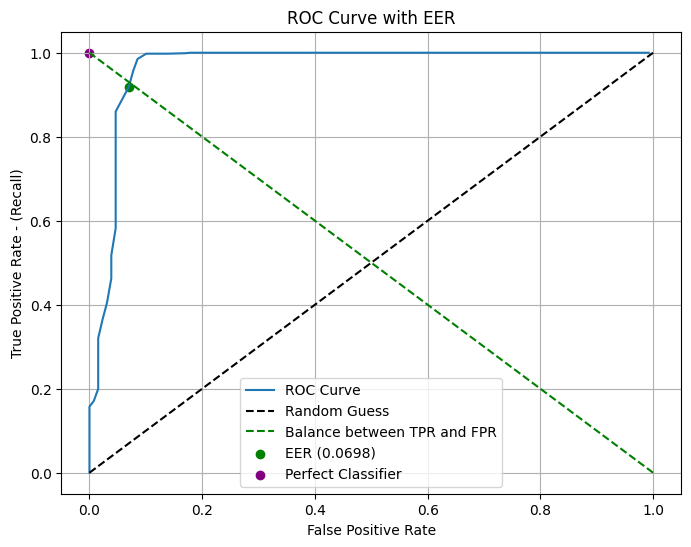

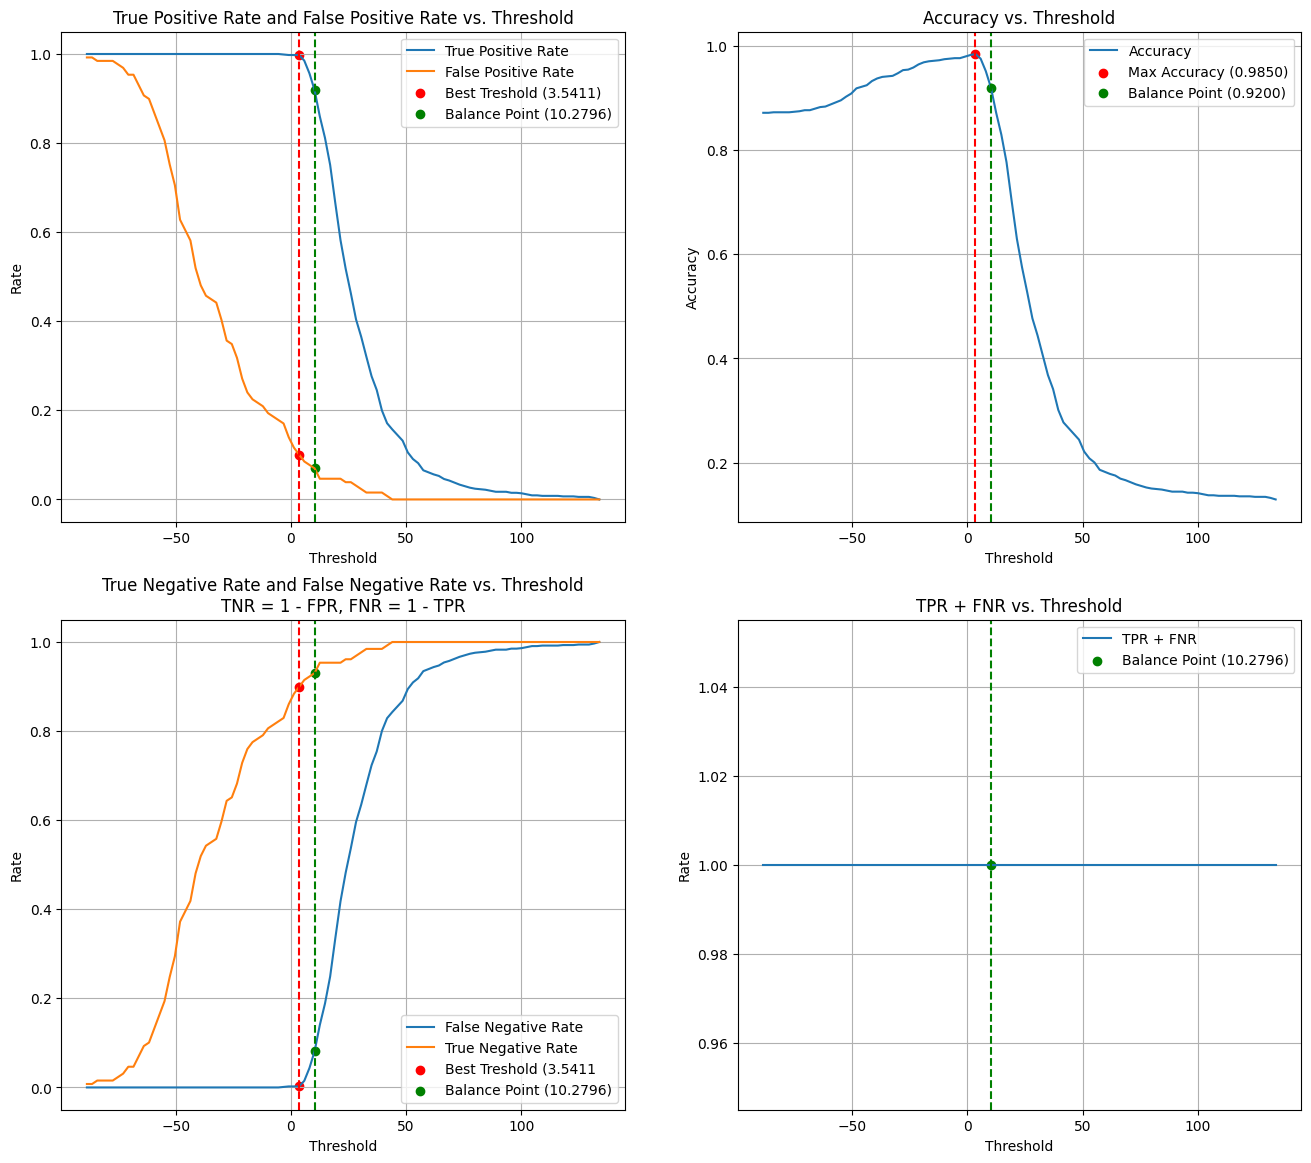

In [32]:
import numpy as np
import matplotlib.pyplot as plt

eps = 1e-5  # avoid logarithm of zero
min = 1 # search the min and max values of the ratio, to understand the optimal range of the values for the threshold
max = 0
# MAP classifier with threshold tau, it selects the class by comparing the ratio between the posterior probabilities of the two classes with the threshold tau
def MAP_tau(X, teta_ham, teta_spam, pi_ham, pi_spam, tau):
    c_MAP = []  # list of the predictions
    global min, max  # used to evaluate the min and max ratio between the posterior probabilities. This values are important to understand the optimal range of the values for the threshold
    for i in range(X.shape[0]):    # iterate through the messages of the test set
        # evaluate the likelihoods of seeing the selected message given the class
        p_x_ham = np.sum(np.log(teta_ham[X[i] == 1] + eps)) + np.sum(np.log(1 - teta_ham[X[i] == 0] + eps))  # we must consider the probability of the presences of the present words and the absence of the absent words
        p_ham_x = p_x_ham + np.log(pi_ham)   # likelihood multiplied by the prior returns the posterior probability -> with the logarithm the multiplication becomes a sum
        p_x_spam = np.sum(np.log(teta_spam[X[i] == 1] + eps)) + np.sum(np.log(1 - teta_spam[X[i] == 0] + eps))
        p_spam_x = p_x_spam + np.log(pi_spam)
        # the ratio in logarithmic scale is the difference between the two logarithms
        if (p_ham_x - p_spam_x < min):  # evaluates min and max ratio 
            min = p_ham_x - p_spam_x
        if(p_ham_x - p_spam_x > max):
            max = p_ham_x - p_spam_x
        c_MAP.append(((p_ham_x - p_spam_x) > tau))  # select the class with the highest a posteriori probability based on the threshold tau
    return np.array(c_MAP)  # return the predictions done with a specific threshold

tau = np.linspace(np.log(3.488487653093545e-39), np.log(1.3078629473030956e+58), 100)   # create a range of values for the threshold in logarithmic scale
tpr_list = []   # lists to store results 
fpr_list = []
tnr_list = []
fnr_list = []
accuracy_list = []

for t in tau:   # iterate through the thresholds
    y_pred = MAP_tau(X_test, teta_ham, teta_spam, pi_ham, pi_spam, t)   # evaluate the predictions of the MAP classifier with the threshold t
    # confusion matrix has the following structure: [[TN, FP], [FN, TP]]
    conf_matrix_MAP_train = confusion_matrix(y_test, y_pred)    # calculate the confusion matrix of the predictions
    TN, FP, FN, TP = conf_matrix_MAP_train.ravel()    # extract the values of the confusion matrix

    TPR = TP / (TP + FN)    # true positive rate -> rappresents the percentage of postive predictions to acutal positive values
    FPR = FP / (FP + TN)    # false positive rate -> rappresents the percentage of postive predictions to acutal negative values
    TNR = TN / (TN + FP)    # true negative rate -> rappresents the percentage of negative predictions to acutal negative values
    FNR = FN / (TP + FN)    # false negative rate -> rappresents the percentage of negative predictions to acutal positive values
    accuracy = (TP + TN) / (TP + FN + TN + FP)  # accuracy -> rappresents the percentage of correct predictions

    tpr_list.append(TPR)
    fpr_list.append(FPR)
    # tnr_list.append(1 - FPR)    # true negative rate -> rappresents the percentage of negative predictions to acutal negative values
    # fnr_list.append(1 - TPR)    # false negative rate -> rappresents the percentage of negative predictions to acutal positive values
    tnr_list.append(TNR)
    fnr_list.append(FNR)
    accuracy_list.append(accuracy)

# select the threshold that minimizes the distance between the ROC curve and the diagonal line of the balance between TPR and FPR
eer_index = np.argmin(np.abs(np.array(fpr_list) + np.array(tpr_list) - 1))
eer_threshold = tau[eer_index]  # extract the value of the threshold at the EER
eer = fpr_list[eer_index]   # extract the value of the EER

# print(f"Max ratio: {max}, Min ratio: {min}")
print(f"Treshdold range: [{np.exp(min)}, {np.exp(max)}]")
print(f"Equal Error Rate (EER): {eer:.4f}")
print(f"Threshold at EER: {eer_threshold:.4f}")
print(f"Maximum Accuracy: {np.max(accuracy_list):.4f}")
print(f"Threshold at Maximum Accuracy: {tau[np.argmax(accuracy_list)]:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_list, tpr_list, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")   # random guess line goes from (0,0) to (1,1)
plt.plot([1, 0], [0, 1], '--', color='green',label="Balance between TPR and FPR")  # balance line goes from (1,0) to (0,1) -> on this line the sum of TPR and FPR is 1
plt.scatter(fpr_list[eer_index], tpr_list[eer_index], color='green', label=f"EER ({eer:.4f})")  # nearest point of the ROC curve to the balance line
plt.scatter(0,1, color='purple', label="Perfect Classifier") # perfect classifier point, impossible to reach
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate - (Recall)')
plt.title('ROC Curve with EER')
plt.grid()
plt.legend()

plt.figure(figsize=(16, 14))
plt.subplot(2, 2, 1)
plt.plot(tau, tpr_list, label="True Positive Rate")
plt.plot(tau, fpr_list, label="False Positive Rate")
# plt.plot(tau, tnr_list, label="True Negative Rate")
# plt.plot(tau, fnr_list, label="False Negative Rate")
plt.scatter(tau[np.argmax(accuracy_list)], tpr_list[np.argmax(accuracy_list)], color='red', label=f"Best Treshold ({tau[np.argmax(accuracy_list)]:.4f})")   # TPR point with the best accuracy
plt.scatter(tau[np.argmax(accuracy_list)], fpr_list[np.argmax(accuracy_list)], color='red')  # FPR point with the best accuracy
plt.axvline(x=tau[np.argmax(accuracy_list)], color='red', linestyle='--')   # vertical line at the threshold at the best accuracy
plt.scatter(eer_threshold, tpr_list[eer_index], color='green', label=f"Balance Point ({eer_threshold:.4f})")    # TPR point at the EER
plt.scatter(eer_threshold, fpr_list[eer_index], color='green')  # FPR point at the EER
plt.axvline(x=eer_threshold, color='green', linestyle='--')   # vertical line at the threshold at the EER
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('True Positive Rate and False Positive Rate vs. Threshold')
plt.grid()
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(tau, accuracy_list, label="Accuracy")
plt.scatter(tau[np.argmax(accuracy_list)], accuracy_list[np.argmax(accuracy_list)], color='red', label=f"Max Accuracy ({np.max(accuracy_list):.4f})")   # point with the best accuracy
plt.axvline(x=tau[np.argmax(accuracy_list)], color='red', linestyle='--')   # vertical line at the threshold with the best accuracy
plt.scatter(eer_threshold, accuracy_list[eer_index], color='green', label=f"Balance Point ({accuracy_list[eer_index]:.4f})")    # point at the EER
plt.axvline(x=eer_threshold, color='green', linestyle='--')  # vertical line at the threshold at the EER
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Threshold')
plt.legend()
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(tau, fnr_list, label="False Negative Rate")
plt.plot(tau, tnr_list, label="True Negative Rate")
plt.scatter(tau[np.argmax(accuracy_list)], tnr_list[np.argmax(accuracy_list)], color='red', label=f"Best Treshold ({tau[np.argmax(accuracy_list)]:.4f}")   # TNR point with the best accuracy
plt.scatter(tau[np.argmax(accuracy_list)], fnr_list[np.argmax(accuracy_list)], color='red')  # FNR point with the best accuracy
plt.axvline(x=tau[np.argmax(accuracy_list)], color='red', linestyle='--')   # vertical line at the threshold at the best accuracy
plt.scatter(eer_threshold, tnr_list[eer_index], color='green', label=f"Balance Point ({eer_threshold:.4f})")    # TNR point at the EER
plt.scatter(eer_threshold, fnr_list[eer_index], color='green')  # FNR point at the EER
plt.axvline(x=eer_threshold, color='green', linestyle='--')   # vertical line at the threshold at the EER
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('True Negative Rate and False Negative Rate vs. Threshold\nTNR = 1 - FPR, FNR = 1 - TPR')
plt.grid()
plt.legend()

plt.subplot(2, 2, 4)
tpr_sum_tnr = np.array(tpr_list) + np.array(fnr_list)   # sum of TPR and FNR, must be equal to 1
plt.plot(tau, tpr_sum_tnr, label="TPR + FNR")
plt.scatter(eer_threshold, 1, color='green', label=f"Balance Point ({eer_threshold:.4f})")    # point at the EER
plt.axvline(x=eer_threshold, color='green', linestyle='--')   # vertical line at the threshold at the EER
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('TPR + FNR vs. Threshold')
plt.grid()
plt.legend()
plt.show()

**Student's comments to Exercise 4**

In this exercise we have been asked to plot the ROC curve to see how to manage the predictions of our model. The ROC curve shows the variation of TPR (True Positive Ratio) vs FPR (False Positive Ratio) in our model by measuring these by using several different tresholds. From this curve we can decide which treshold our system should use, in order to obtain the desired results of TPR and FPR. For doing so, we must plot the curve and so we must evaluate our predictions by using many different values of $\tau$. 
Firstly, we have to build our classifier. In my case I am using MAP classifier cause the priors of the two classes are not equal. The MAP classifier must have a little modification of how it predicts the classes, cause originally it assigns to each message the class that maximize the posterior probability, but now we want to make this assignment by considering the parameter $\tau$. So, we evaluate the ratio between the two posterior probabilities and if the result is higher that $\tau$ we assign to the message the class of the numerator, otherwise we assign to it the class of the denominator.
The formula is: $c_{pred} = \frac{p(c=1|x)}{p(c=0|x)} > \tau$.
Note that in our code we are working with logarithms, cause the product between more probabilities, so small numbers, could affect underflow. So with logarithms we can avoid products and use sums. In this case the fraction becomes a difference between two logarithmic probabilities, and we compere the result with a logarithmic value of $\tau$. 
Now we must understand how to evaluate our predictions in a oprimal range of tresholds. We must know that the ROC curve must connect the point (TPR = 0, FPR = 0) with (TPR = 1, FPR = 1). The first point is obtained with a maximum value of $\tau$, cause no ratio can be higher than it and so is impossible to predict positive, the other one is obtained with the minimum value of $\tau$, cause no ratio can be lower than it so is impossible to predict negative. We can get the range of values for the treshold by measuring the max and min ratio obtained in our model. In my exercise these are results of logarithmic evaluations, so i have to apply the exponential on them to see the actual values. See that the range is very wide and this could be a problem in plotting, so also the treshold is a vector of logarithmic values contained in the range just evaluated.
Now that we have the opimal range, we can compute our classifier for each value od $\tau$ and see how TPR and FPR changes. The oprimality of a classifier can be evaluated by the area under the ROC curve, and cause the TPR and FPR goes from 0 to 1, the maximal are is equal to 1 and is obtained by the ROC curve that passes through the point (TPR = 1, FPR = 0). This point is called 'Perfect Classifier' and is not pratically reachable. We know also that the standard linear line that connect (0,0) to (1,1) rappresents the ROC curve of a classifier that assign randomoly the classes.
Once we have our plot and so our ROC curve, we have to decide which value of $\tau$ we must use. For doing so we have to consider the 'Balance Point', that corresponds to the point of intersection between the ROC curve and the straight diagonal line that connect (0,1) to (1,0). With the correspondent value of $\tau$ for that point, the model balances FPR and FNR. Is on us to decide if this is good or is bad. Commonly that point is a good choice of $\tau$, but there might be cases where we are more interested into minimize FPR or FNR. 
The point of the ROC curve that is nearer to the Balance Line rappresent the Equal Error Rate (EER). This is the point where TPR + FPR -> 1. The value of the error in this point is equal to the value of FPR on it.
Then I have plotted the trend of TPR and FPR versus the treshoulds , in order to see how they change while $\tau$ is increasing. The third plot shows the trend of the accuracy versus the tresholds. On this plot is put on evidence the point corresponding to the treshold that gives more accuracy to the classifier, and is put on evidence also the point of the EER. This two points are shown also in the previus graph, where we can see the values of TPR and FPR with those tresholds.

I have added two graph at the bottom in order to see that TNR = 1 - FPR, FNR = 1 - TPR. One shows the trends of TNR and FNR, so we can clearly see that on EER point the probabilities of bad predictions are the same. Then the last plot shows that TPR + FNR is equal to 1 for all the tresholds, this is the same for TNR + FPR.

**Exercise 5 – Classification – continuous data**

This exercise employs the Iris dataset already employed in Exercise 1, and performs model fitting and classification using several versions of **Gaussian discriminative analysis**. However, for this exercise the available data have to be divided into two sets, namely *training* and *test* data. 

You will have to 1) re-fit the training data to the specific model (see below), 2) classify each of the test samples, and 3) calculate the accuracy of each classifier.

Classifiers to be employed:
*   Two-class quadratic discriminant analysis (fitting: both mean values and covariance matrices are class-specific – same as in exercise 1).
*   Two-class linear discriminant analysis (fitting: class-specific mean values as in the previous case. Shared covariance matrix is calculated putting together the elements of both classes; the mean values should also be recalculated accordingly).

QDA Accuracy: 0.94
LDA Accuracy: 0.9


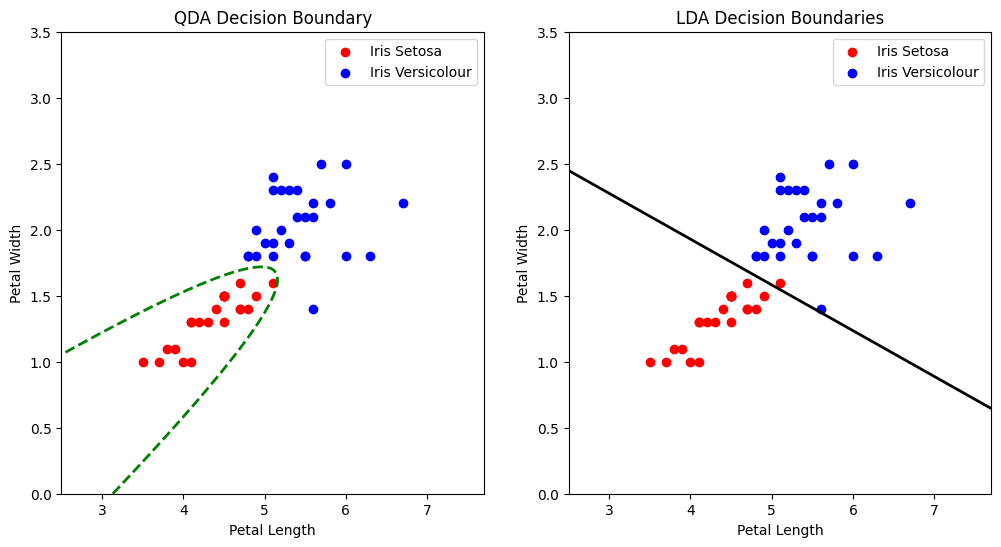

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

Dataset1 = h5py.File("./Lab2_Ex_1_Iris.hdf5")
Data = np.array(Dataset1.get('Dataset')) 

Train = Data[:50,:]
Test = Data[50:,:]

# in order to perform QDA we must evaluate the means and covariance matrices for each class
class_ISetosa = Train[Train[:, -1] == 0]  # read the dataset and extract the rows that have the last column equal to 0
class_IVersicolour = Train[Train[:, -1] == 1] # read the dataset and extract the rows that have the last column equal to 1

mean_ISetosa = np.mean(class_ISetosa[:, :-1], axis=0)   # mean value - the last column is the class, so i don't consider it
mean_IVersicolour = np.mean(class_IVersicolour[:, :-1], axis=0)  # mean value
cov_ISetosa = np.cov(np.transpose(class_ISetosa[:, :-1]))   # covariance matrix
cov_IVersicolour = np.cov(np.transpose(class_IVersicolour[:, :-1])) # covariance matrix

# in order to perform LDA we must evaluate the means and the covariance matrix of the combined classes
class_combined_ = Train[:, :]    # concatenate the two classes
# class_combined = np.concatenate((class_ISetosa, class_IVersicolour), axis=0)    # concatenate the two classes
# cov_combined = np.cov(np.transpose(class_combined[:, :-1]))   # calculate the covariance matrix of the combined classes
cov_combined_ = np.cov(np.transpose(class_combined_[:, :-1]))   # calculate the covariance matrix of the combined classes

P_ISetosa = len(class_ISetosa) / len(Train) # calculate the prior probability of the class 'Iris Setosa'
P_IVersicolour = len(class_IVersicolour) / len(Train)   # calculate the prior probability of the class 'Iris Versicolour'

# QDA - Quadratic Discriminant Analysis
def QDA(x, mean, cov, prior):
    cov_inv = np.linalg.inv(cov)  # Inverse of the covariance matrix
    cov_det = np.linalg.det(cov)  # Determinant of the covariance matrix
    diff = x - mean # Difference between the feature vector and the mean vector
    return -0.5 * np.log(cov_det) - 0.5 * np.dot(np.dot(diff.T, cov_inv), diff) + np.log(prior) # Discriminant function

predictions = []
for test_sample in Test[:, :-1]:    # iterate through the test samples
    # for each test sample determine the discriminant function for each class, the class with the highest value will be the predicted class
    g_setosa = QDA(test_sample, mean_ISetosa, cov_ISetosa, P_ISetosa)   # calculate the discriminant function for the class 'Iris Setosa'
    g_versicolour = QDA(test_sample, mean_IVersicolour, cov_IVersicolour, P_IVersicolour)   # calculate the discriminant function for the class 'Iris Versicolour'
    # assign to the sample the class with the higher discriminant value
    predicted_class = 0 if g_setosa > g_versicolour else 1  
    predictions.append(predicted_class)

true_labels = Test[:, -1]  # true class labels from the test data
accuracy = np.mean(np.array(predictions) == true_labels)    # compare the predicted classes with the true classes and evaluate the accuracy
print("QDA Accuracy:", accuracy)

# LDA - Linear Discriminant Analysis
def LDA(x, mean, cov_shared, prior):
    cov_inv = np.linalg.inv(cov_shared)  # Inverse of shared covariance matrix
    return np.dot(np.dot(x.T, cov_inv), mean) - 0.5 * np.dot(np.dot(mean.T, cov_inv), mean) + np.log(prior)  # Discriminant function

predictions_lda = []
for test_sample in Test[:, :-1]:        # iterate through the test samples
    # for each test sample determine the discriminant function for each class, the class with the highest value will be the predicted class
    g_setosa = LDA(test_sample, mean_ISetosa, cov_combined_, P_ISetosa)  # calculate the discriminant function for the class 'Iris Setosa'
    g_versicolour = LDA(test_sample, mean_IVersicolour, cov_combined_, P_IVersicolour)  # calculate the discriminant function for the class 'Iris Versicolour'
    
    # assign to the sample class with the higher discriminant value
    predicted_class = 0 if g_setosa > g_versicolour else 1  # assign the class with the higher discriminant value
    predictions_lda.append(predicted_class)

accuracy_lda = np.mean(np.array(predictions_lda) == true_labels)    # compare the predicted classes with the true classes and evaluate the accuracy
print("LDA Accuracy:", accuracy_lda)

# Create a mesh grid
x_min, x_max = Train[:, 0].min() - 1, Train[:, 0].max() + 1
y_min, y_max = Train[:, 1].min() - 1, Train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Evaluate QDA decision function
Z_qda = np.array([QDA(np.array([xx[i, j], yy[i, j]]), mean_ISetosa, cov_ISetosa, P_ISetosa) - 
                  QDA(np.array([xx[i, j], yy[i, j]]), mean_IVersicolour, cov_IVersicolour, P_IVersicolour)
                  for i in range(xx.shape[0]) for j in range(xx.shape[1])])
Z_qda = Z_qda.reshape(xx.shape)

# Evaluate LDA decision function
Z_lda = np.array([LDA(np.array([xx[i, j], yy[i, j]]), mean_ISetosa, cov_combined_, P_ISetosa) - 
                  LDA(np.array([xx[i, j], yy[i, j]]), mean_IVersicolour, cov_combined_, P_IVersicolour)
                  for i in range(xx.shape[0]) for j in range(xx.shape[1])])
Z_lda = Z_lda.reshape(xx.shape)

# QDA plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

# data points
plt.scatter(class_ISetosa[:, 0], class_ISetosa[:, 1], label='Iris Setosa', color='red')
plt.scatter(class_IVersicolour[:, 0], class_IVersicolour[:, 1], label='Iris Versicolour', color='blue')

# QDA decision boundary
plt.contour(xx, yy, Z_qda, levels=[0], linewidths=2, colors='black', linestyles='dashed')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.title('QDA Decision Boundary')

# LDA plot
plt.subplot(1, 2, 2)

# data points
plt.scatter(class_ISetosa[:, 0], class_ISetosa[:, 1], label='Iris Setosa', color='red')
plt.scatter(class_IVersicolour[:, 0], class_IVersicolour[:, 1], label='Iris Versicolour', color='blue')

# LDA decision boundary
plt.contour(xx, yy, Z_lda, levels=[0], linewidths=2, colors='black', linestyles='solid')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.title('LDA Decision Boundaries')
plt.show()

**Student's comments to Exercise 5**

In this exercixe we have been asked to perform two different discriminant analysis algorithms to classify test set samples. First thing first, we split the dataset into training and test set. Then we evaluate statistics from the training set as: mean vectors $\mu_k$, prior probabilities $\pi_k$, and covariance matrices $\Sigma_k$ for each class $k$.
The algorithms that we want to perform are QDA - Quadratic Discriminant Analysis, and LDA - Linear Discriminant Analysis. Both assumes that all the classes are normally distributed, the difference between them is that LDA assumes also that all the classes share the same covariance matrix $\Sigma$.
The aim of these algorithms is to divide the data space of points with lines, could be linear for LDA or quadratic for QDA. This lines split the data space so we can assign to a point the class by observing in which subspace it falls. LDA splits by using a linear line, this solution often is not enough complex to separate properly data, but it uses fewer parameters cause the it saves just one covariance matrix. QDA splits by using a quadratic line, a better solution more complex but there could be cases where also this cannot perform properly, in those cases Neural Network are the solution.
Note that if a point falls exactly on the line we cannot understand which class is better, cause this rappresents exactly the balance between the splitted classes.

QDA formula:

$\delta_k(x)=-\frac{1}{2}\ln{|\Sigma_k|}-\frac{1}{2}(x-\mu_k)^T \Sigma_k^{-1}(x-\mu_k)+\ln{(\pi_k)}$

LDA formula:

$\delta_k(x)=x^T\Sigma^{-1}\mu_k-\frac{1}{2}\mu_k^T \Sigma^{-1} \mu_k + \ln{(\pi_k)}$



**Exercise 6 – Classification – continuous data**

Classify the data in the phoneme dataset from Lab. 1 using quadratic discriminant analysis, linear discriminat analysis and a Naive Bayes classifier. 

Compute the accuracy of each classifier and compare its performance with that of the k-nn classifier developed in Lab. 1.

Note: in Lab1 we had to employ a subset of the oiginal dataset due to the fact that k-nn has a quadratic complexity making it unfit for use on large datasets. The algorithms illustrated in this Lab have smaller complexity and thus it is possible to train on more data.

For this exercise you can use the sklearn library.

In [34]:
import numpy as np
import h5py

Dataset2 = h5py.File("./Lab2_Ex_6_phoneme.hdf5")
Data = np.array(Dataset2.get('Dataset'))
Train = Data[:4000,:]
Test = Data[4000:,:]
len_dat = np.shape(Test)[0]

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#Part 1
clf = LinearDiscriminantAnalysis()  # LDA model
#Complete here
X_train, y_train = Train[:, :-1], Train[:, -1]  # separate the features from the labels for the training data
X_test, y_test = Test[:, :-1], Test[:, -1]  # separate the features from the labels for the test data

clf.fit(X_train, y_train)   # fit the LDA classifier on the training data
y_pred_lda = clf.predict(X_test)    # use the trained classifier to predict the labels of the test data
accuracy_lda = accuracy_score(y_test, y_pred_lda)   # evaluate the accuracy of the LDA classifier
print(f"LDA Accuracy: {accuracy_lda:.4f}")

# my code to check if the results correspond
# class_0 = Train[Train[:, -1] == 0]  # read the dataset and extract the rows that have the last column equal to 0
# class_1 = Train[Train[:, -1] == 1]  # read the dataset and extract the rows that have the last column equal to 1
# class_2 = Train[Train[:, -1] == 2]  # read the dataset and extract the rows that have the last column equal to 2
# class_3 = Train[Train[:, -1] == 3]  # read the dataset and extract the rows that have the last column equal to 3
# class_4 = Train[Train[:, -1] == 4]  # read the dataset and extract the rows that have the last column equal to 4

# mean_0 = np.mean(class_0[:, :-1], axis=0)   # mean value - the last column is the class, so i don't consider it
# mean_1 = np.mean(class_1[:, :-1], axis=0)   # mean value
# mean_2 = np.mean(class_2[:, :-1], axis=0)   # mean value
# mean_3 = np.mean(class_3[:, :-1], axis=0)   # mean value
# mean_4 = np.mean(class_4[:, :-1], axis=0)   # mean value

# P_0 = len(class_0) / len(Train) # calculate the prior probability of the class 0
# P_1 = len(class_1) / len(Train) # calculate the prior probability of the class 1
# P_2 = len(class_2) / len(Train) # calculate the prior probability of the class 2
# P_3 = len(class_3) / len(Train) # calculate the prior probability of the class 3
# P_4 = len(class_4) / len(Train) # calculate the prior probability of the class 4

# cov_0 = np.cov(np.transpose(class_0[:, :-1]))   # covariance matrix
# cov_1 = np.cov(np.transpose(class_1[:, :-1]))   # covariance matrix
# cov_2 = np.cov(np.transpose(class_2[:, :-1]))   # covariance matrix
# cov_3 = np.cov(np.transpose(class_3[:, :-1]))   # covariance matrix
# cov_4 = np.cov(np.transpose(class_4[:, :-1]))   # covariance matrix

# cov_shared = np.cov(np.transpose(Train[:, :-1]))   # calculate the covariance matrix of the combined classes

# predictions_lda = []
# for test_sample in Test[:, :-1]:    # iterate through the test samples
#     g_0 = LDA(test_sample, mean_0, cov_shared, P_0)   # calculate the discriminant function for the class 0
#     g_1 = LDA(test_sample, mean_1, cov_shared, P_1)   # calculate the discriminant function for the class 1
#     g_2 = LDA(test_sample, mean_2, cov_shared, P_2)   # calculate the discriminant function for the class 2
#     g_3 = LDA(test_sample, mean_3, cov_shared, P_3)   # calculate the discriminant function for the class 3
#     g_4 = LDA(test_sample, mean_4, cov_shared, P_4)   # calculate the discriminant function for the class 4

#     # assign to the sample the class with the higher discriminant value
#     predicted_class = np.argmax([g_0, g_1, g_2, g_3, g_4])  # assign the class with the higher discriminant value
#     predictions_lda.append(predicted_class)

# true_labels = Test[:, -1]  # true class labels from the test data
# accuracy_lda = np.mean(np.array(predictions_lda) == true_labels)    # compare the predicted classes with the true classes and evaluate the accuracy
# print("MyLDA Accuracy:", accuracy_lda)

#Part 2
clf2 = QuadraticDiscriminantAnalysis()  # QDA model
#Complete here
clf2.fit(X_train, y_train)  # fit the QDA classifier on the training data
y_pred_qda = clf2.predict(X_test)   # use the trained classifier to predict the labels of the test data
accuracy_qda = accuracy_score(y_test, y_pred_qda)   # evaluate the accuracy of the QDA classifier
print(f"QDA Accuracy: {accuracy_qda:.4f}")

# my code to check if the results correspond
# predictions_qda = []
# for test in Test[:, :-1]:   # iterate through the test samples
#     g_0 = QDA(test, mean_0, cov_0, P_0)   # calculate the discriminant function for the class 0
#     g_1 = QDA(test, mean_1, cov_1, P_1)   # calculate the discriminant function for the class 1
#     g_2 = QDA(test, mean_2, cov_2, P_2)   # calculate the discriminant function for the class 2
#     g_3 = QDA(test, mean_3, cov_3, P_3)   # calculate the discriminant function for the class 3
#     g_4 = QDA(test, mean_4, cov_4, P_4)   # calculate the discriminant function for the class 4

#     # assign to the sample the class with the higher discriminant value
#     predicted_class = np.argmax([g_0, g_1, g_2, g_3, g_4])  # assign the class with the higher discriminant value
#     predictions_qda.append(predicted_class)

# accuracy_qda = np.mean(np.array(predictions_qda) == true_labels)    # compare the predicted classes with the true classes and evaluate the accuracy
# print("MyQDA Accuracy:", accuracy_qda)

#Part 3
clf3 = GaussianNB() # Naive Bayes model
#Complete here
clf3.fit(X_train, y_train)  # fit the Naive Bayes classifier on the training data
y_pred_nb = clf3.predict(X_test)    # use the trained classifier to predict the labels of the test data
accuracy_nb = accuracy_score(y_test, y_pred_nb)  # evaluate the accuracy of the Naive Bayes classifier
print(f"Naive Bayes Accuracy: {accuracy_nb:.4f}")

LDA Accuracy: 0.9411
QDA Accuracy: 0.8880
Naive Bayes Accuracy: 0.9018


**Student's comments to Exercise 6**

The given dataset is composed of 4509 collected samples, each with 256 features and the corresponding class. The class is the phoneme of the speech sampled, and the features correspond to vocals of the speech gathered with a frequency of 16 kHz. The classifier algorithm that performs best on these data is LDA. I assume that this is because the dataset is very large, so the correlations between the features are less important. QDA is the worst algorithm in this case, and in my opinion, this could be caused by the fact that using a covariance matrix for each class in this large dataset caused overfitting. NBC has a discrete result, better than QDA but worse than LDA. NBC is good for predictions in large datasets but assumes no correlations between the features of the same class. I think that in this case, there are correlations, and NBC loses accuracy for this reason.

Naive classifier is called Naive cause it mades an assumption unreal for the real world, that all the features are conditionally independent given the class label. This means that they assume that the presence (or value) of a feature doesn't depend on the presence (or value) of any other feature, given the class.

LDA, QDA, and Naïve Bayes: Key Differences
Linear Discriminant Analysis (LDA), Quadratic Discriminant Analysis (QDA), and Naïve Bayes are classification models based on probability distributions but differ in their assumptions about the data.

LDA assumes that features for each class follow a multivariate Gaussian distribution with the same covariance matrix across all classes. This results in linear decision boundaries.
The fact that LDA has the same covariance matrix for all the classes, means that when we evaluate the decision line by using the division between the probabilities of the classes $\frac{P(y_i|x)} {P(y_j|x)}$, the covariance matrix goes away for semplifications. The covariance matrix is contained in the formula for calculate the posterior probability.

QDA also assumes Gaussian distributions but allows each class to have its own covariance matrix, leading to quadratic decision boundaries.
In QDA each class has its own covariance, so when we are calculating the division between the posterior probabilities, the cov matrixes stays in the calculation and bring to a quadratic line.

Naïve Bayes (NB) assumes that features are conditionally independent given the class label, simplifying computation by ignoring feature interactions. Its decision boundaries are neither strictly linear nor quadratic but depend on the class-conditional probabilities.

MPA and MLE: Decision Rules
Maximum Posterior Assignment (MPA): Assigns a sample to the class with the highest posterior probability P(y∣x), combining the prior probabilities P(y) and likelihood P(x∣y).

Maximum Likelihood Estimation (MLE): Focuses on maximizing the likelihood P(x∣y), ignoring prior probabilities. MPA is generally more robust as it includes priors.

For all these models, the predicted class is chosen based on argmax y​ P(y∣x) in MPA or argmax y P(x∣y) in MLE.

Accuracy, TPR, and FPR
Accuracy measures overall correctness (Correct predictions/Total predictions).
True Positive Rate (TPR), or recall, measures sensitivity (True Positives/All Positives).
False Positive Rate (FPR) quantifies the proportion of negatives misclassified as positives (False Positives/All Negatives).

Class Prediction Strategies
LDA and QDA compute class probabilities using Gaussian distributions. LDA’s linearity simplifies boundaries, while QDA’s flexibility adapts to non-linear data.
Naïve Bayes uses the independence assumption to estimate class probabilities, relying heavily on P(x∣y) for predictions.
While LDA often outperforms in linear problems and QDA in non-linear scenarios, Naïve Bayes can excel in high-dimensional settings with sparse data, such as text classification. Accuracy reflects the model's overall performance, but TPR and FPR provide insights into how well it handles imbalanced classes.